<a href="https://colab.research.google.com/github/juliaDmiranda/Banco-de-Dados/blob/main/TRAB1_J%C3%BAliaMirandaRodrigues_Thayn%C3%A1MarinsGomesAlves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports Necessários

In [ ]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


# Importando arquivo

In [ ]:
url = "https://raw.githubusercontent.com/weitzelleila/Datasets/main/hospital-readmission.csv"
database = pd.read_csv(url)

In [ ]:
database["A1Cresult"]

0         None
1         None
2         None
3         None
4         None
          ... 
101761      >8
101762    None
101763    None
101764    None
101765    None
Name: A1Cresult, Length: 101766, dtype: object

In [ ]:
# verificar o tipo de cada coluna
database.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [ ]:
database['weight'].head()

0    ?
1    ?
2    ?
3    ?
4    ?
Name: weight, dtype: object

(101766, 50)
       encounter_id   patient_nbr  admission_type_id  \
count  1.017660e+05  1.017660e+05      101766.000000   
mean   1.652016e+08  5.433040e+07           2.024006   
std    1.026403e+08  3.869636e+07           1.445403   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.496119e+07  2.341322e+07           1.000000   
50%    1.523890e+08  4.550514e+07           1.000000   
75%    2.302709e+08  8.754595e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000       

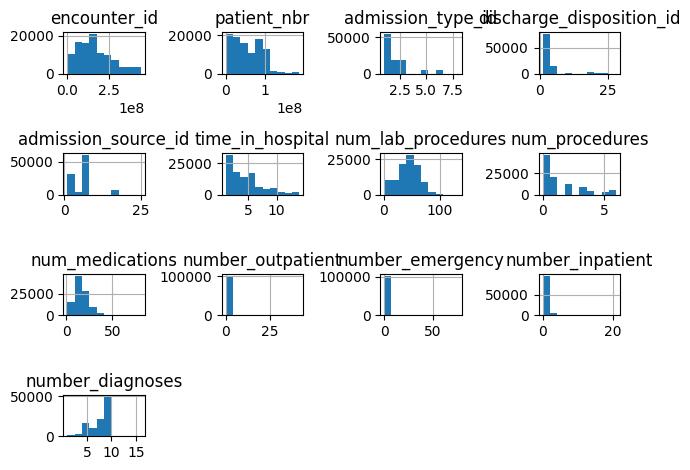

In [ ]:
# vendo o shape do dataset
print(database.shape)
# estatistica de cada variável
print(database.describe())
# plotando os histogramas

# Gere o histograma com espaçamento ajustado
database.hist(rwidth=2)

# Ajuste a largura das figuras para evitar sobreposição
plt.tight_layout()

# Exiba o histograma
plt.show()

plt.show()

# Pré - Processamento

#### Substituindo o caracter "?" por null 

In [ ]:
database.replace('?', pd.NA, inplace=True)



#### Transformando variaveis categoricas em númericas

##### Age

In [ ]:
# Converter os intervalos de idade em pontos médios
database['age'] = database['age'].apply(lambda x: (int(x.strip('[]()').split('-')[0]) + int(x.strip('[]()').split('-')[1])) / 2 if pd.notnull(x) else np.nan)

# Converter o tipo da coluna "idade" para float
database['age'] = database['age'].astype(int)


##### Weight

In [ ]:
# Criar uma máscara booleana para identificar os valores ">200"
mask = database['weight'] == '>200'
mask
# Substituir os valores ">200" por NaN
database.loc[mask, 'weight'] = np.nan

In [ ]:
# Converter os intervalos de peso em pontos médios
database['weight'] = database['weight'].apply(lambda x: (int(x.strip('[]()').split('-')[0]) + int(x.strip('[]()').split('-')[1])) / 2 if pd.notnull(x) else np.nan)

# Converter o tipo da coluna "peso" para float
database['weight'] = database['weight'].astype(float)

In [ ]:
# Filtrar as linhas que não são nulas
linhas_nao_nulas = database[database['weight'].notnull()]

# Exibir as linhas não nulas
linhas_nao_nulas

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1102,8042082,94466574,Caucasian,Male,55,87.5,6,1,17,2,...,No,Steady,No,No,No,No,No,No,Yes,>30
1108,8057670,96198543,<NA>,Female,85,62.5,6,5,17,9,...,No,Steady,No,No,No,No,No,Ch,Yes,>30
1132,8235036,79874631,Caucasian,Female,65,12.5,6,1,17,5,...,No,Steady,No,No,No,No,No,Ch,Yes,>30
1136,8274126,90421380,Caucasian,Female,45,87.5,6,1,17,3,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
1190,8421486,55628172,Caucasian,Female,75,87.5,6,6,17,11,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101456,439606454,113392368,AfricanAmerican,Male,65,87.5,2,1,1,2,...,No,No,No,No,No,No,No,No,No,>30
101516,440252540,97508430,Caucasian,Male,65,112.5,1,1,7,4,...,No,No,No,No,No,No,No,Ch,Yes,>30
101640,442077494,62420742,Caucasian,Female,75,62.5,1,3,7,8,...,No,Steady,No,No,No,No,No,No,Yes,NO
101667,442577684,78208677,Caucasian,Male,75,87.5,1,3,7,4,...,No,No,No,No,No,No,No,Ch,Yes,<30


## Realizar o tratamento de valores nulos


#### Verificando a quantidade de valores nulos

In [ ]:
# Conte o número de registros nulos para cada coluna
null_counts = database.isna().sum()

# Filtrar apenas os resultados diferentes de zero
null_counts[null_counts != 0]

race                  2273
weight               98572
payer_code           40256
medical_specialty    49949
diag_1                  21
diag_2                 358
diag_3                1423
dtype: int64

#### Matriz de correlação

<ipython-input-75-4225dd29e1ee>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = database.corr()


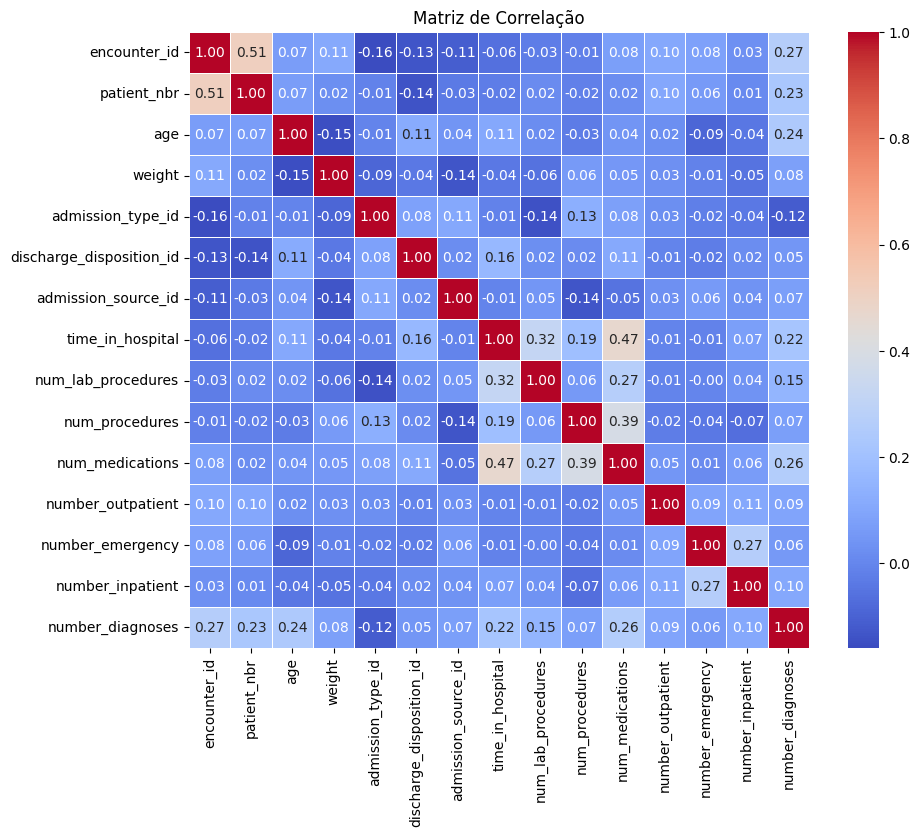

In [ ]:
# Calcular a matriz de correlação
correlation_matrix = database.corr()

# Plota o gráfico da matriz de correlação usando o seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()


#### Tratando os valores nulos 

## Outro

## Outro

## Outro

# Processamento da base

Quais são os fatores preditores mais fortes de readmissão hospitalar em pacientes diabéticos?


Quão bem podemos prever a readmissão hospitalar neste conjunto de dados com recursos limitados?